# Part 1

In [43]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import seaborn as sns
import statsmodels as smf

In [2]:
raw_data = open("all_annotated.csv","r")
raw_data

<_io.TextIOWrapper name='all_annotated.csv' mode='r' encoding='UTF-8'>

In [3]:
rawdata_df = pd.read_csv(raw_data)
rawdata_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [4]:
#Limit the dataset to genes with a median expression across samples of greater than zero
median_df = rawdata_df[rawdata_df.median(axis = 1, numeric_only = True) > 0]
median_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


In [5]:
medianTf_df = np.log2(median_df.iloc[:,2:].add(0.1))
medianTf_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [6]:
GeneClustering = linkage(medianTf_df)
DataFrame(GeneClustering)

,0,1,2,3
0,1323.0,1324.0,0.000000,2.0
1,2163.0,2164.0,0.000000,2.0
2,4368.0,4369.0,0.000000,2.0
3,1977.0,1978.0,0.000000,2.0
4,707.0,708.0,0.000000,2.0
...,...,...,...,...
8607,3746.0,17219.0,13.057465,8609.0
8608,481.0,17220.0,13.078356,8610.0
8609,3932.0,17221.0,13.096403,8611.0
8610,480.0,17222.0,13.262123,8612.0


In [7]:
SampleClustering = linkage(medianTf_df.T)
DataFrame(SampleClustering)

,0,1,2,3
0,2.0,10.0,148.802332,2.0
1,0.0,16.0,161.182269,3.0
2,8.0,17.0,167.166344,4.0
3,4.0,12.0,176.959610,2.0
4,7.0,15.0,199.066939,2.0
5,14.0,20.0,200.971407,3.0
6,3.0,18.0,202.904768,5.0
7,6.0,21.0,203.820339,4.0
8,9.0,22.0,210.290183,6.0
9,11.0,24.0,210.353481,7.0


<AxesSubplot:>

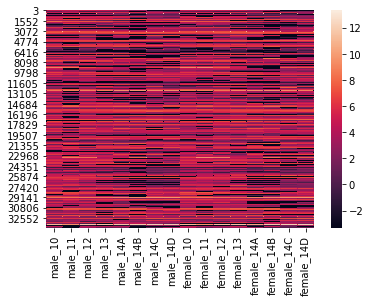

In [8]:
sns.heatmap(medianTf_df)

In [9]:
label_names = list(rawdata_df.columns[2:]) 
label_names

['male_10',
 'male_11',
 'male_12',
 'male_13',
 'male_14A',
 'male_14B',
 'male_14C',
 'male_14D',
 'female_10',
 'female_11',
 'female_12',
 'female_13',
 'female_14A',
 'female_14B',
 'female_14C',
 'female_14D']

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [115.0, 115.0, 133.75, 133.75],
  [105.0, 105.0, 124.375, 124.375],
  [95.0, 95.0, 114.6875, 114.6875],
  [80.0, 80.0, 104.84375, 104.84375],
  [65.0, 65.0, 92.421875, 92.421875],
  [50.0, 50.0, 78.7109375, 78.7109375],
  [13.75, 13.75, 64.35546875, 64.35546875]],
 'dcoord': [[0.0, 199.06693917317384, 199.06693917317384, 0.0],
  [0.0, 200.97140686659216, 200.97140686659216, 199.06693917317384],
  [0.0, 203.82033861587234, 203.82033861587234, 200.97140686659216],
  [0.0, 225.02139065289109, 225.02139065289109, 0.0],
  [0.0, 176.95961019657616, 176.95961019657616, 0.0],
  [0.0, 148.8023324368892, 148.8023324368892, 0.0],
  [0.0, 161.18226855729915, 161.18226855729915, 148.8023324368892],
  [0.0, 167.16634436378374, 167.16634436378374, 161.1822685

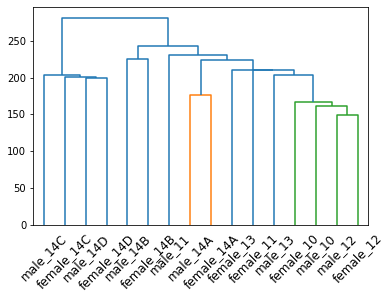

In [10]:
dendrogram(SampleClustering, labels = label_names, leaf_rotation = 45)

# Part 2

In [11]:
medianTf_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [25]:
genes = []
pvalue = []
for index, row in medianTf_df.iterrows():
    days = [10,10,11,11,12,12,13,13,14,14,14,14,14,14]
    stages = [row['male_10'],row['female_10'],row['male_11'],row['female_11'],row['male_12'],row['female_12'],row['male_14A'],row['female_14A'],row['male_14B'],row['female_14B'],row['male_14C'],row['female_14C'],row['male_14D'],row['female_14D']]
    stages_cons = sm.add_constant(stages)
    model = sm.OLS(days,stages_cons)
    model1 = model.fit()
    genes.append(index)
    pvalue.append(model1.pvalues[1])

In [27]:
pvalue[0:20]

[0.8643901796576339,
 0.25532791319189885,
 0.41066809218996836,
 0.07784678916593654,
 0.3141733475041439,
 0.057716207752429825,
 0.4543116695475957,
 0.9317592406664693,
 3.3500872834975726e-06,
 0.01659306720948975,
 0.01931889930298608,
 0.2715120610645092,
 0.7108760234189906,
 1.989118165973355e-07,
 4.649447480611023e-07,
 1.8751940122100862e-05,
 0.0699981959437924,
 0.3668493378576727,
 0.03881400951921406,
 0.13900988924337138]

In [29]:
pvalue.sort()

In [31]:
ypoints = [(days+1)/len(pvalue) for days in range(len(pvalue))]

In [32]:
log_ypoints = [-1*np.log10(days) for days in ypoints]

In [33]:
final_values = [-1*np.log10(days) for days in pvalue]

Text(0.5, 1.0, 'QQ Plot for p-values of Differential Expression')

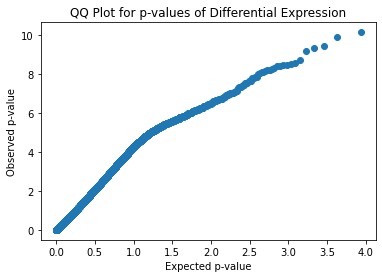

In [37]:
fig,ax = plt.subplots()
ax.scatter(log_ypoints, final_values)
plt.xlabel("Expected p-value")
plt.ylabel("Observed p-value")
ax.set_title("QQ Plot for p-values of Differential Expression")

In [66]:
pvalue_fdr = smf.stats.multitest.fdrcorrection(pvalue, alpha=0.05)

In [67]:
pvalue_fdr = pd.DataFrame(pvalue_fdr).transpose()
pvalue_fdr

,0,1
0,True,5.58572e-07
1,True,5.58572e-07
2,True,9.4247e-07
3,True,9.4247e-07
4,True,1.10684e-06
...,...,...
8608,False,0.998408
8609,False,0.998921
8610,False,0.999311
8611,False,0.999311


In [71]:
df_filtered = pvalue_fdr[pvalue_fdr[0] == True] 
df_filtered

,0,1
0,True,5.58572e-07
1,True,5.58572e-07
2,True,9.4247e-07
3,True,9.4247e-07
4,True,1.10684e-06
...,...,...
3236,True,0.0491832
3237,True,0.0493242
3238,True,0.0493709
3239,True,0.0494343
